<a href="https://colab.research.google.com/github/nidhi-158/FeynnLabs_EV-market/blob/main/behavioural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df=pd.read_csv("/content/behavioural_segment_data.csv")

In [ ]:
df['Price'].unique()

array([ 800000, 1000000, 1200000, 1600000,  700000, 1100000,  110000,
       3000000, 1300000, 1500000])

In [ ]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [ ]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [ ]:
categoricall_column=df[['Profession','Marrital Status','Education','Personal loan']]
numerical_column=df[['Age','No of Dependents','Total Salary','Price']]

In [ ]:
le=LabelEncoder()
for column in categoricall_column:
  df[column]=le.fit_transform(df[column])

In [ ]:
scaler=StandardScaler()
for column in numerical_column:
  df[column]=scaler.fit_transform(df[[column]])

R-squared: 0.60


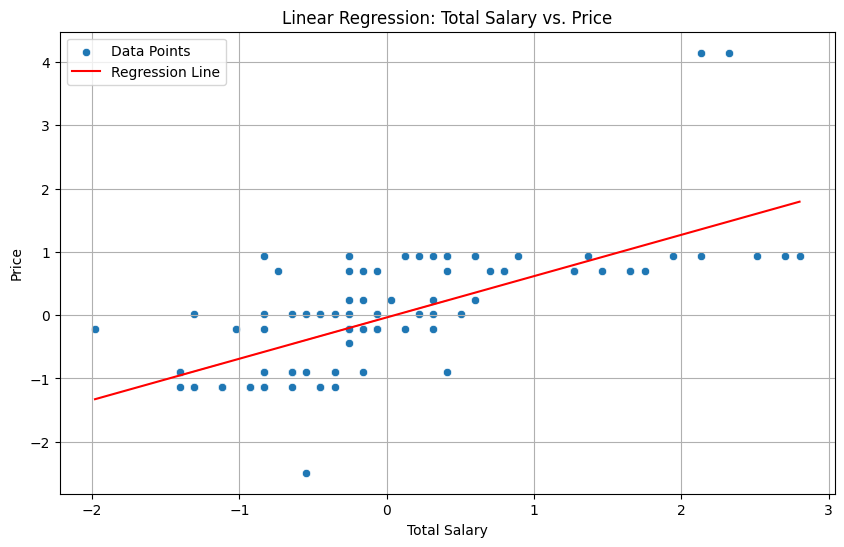

In [ ]:
X = df[['Total Salary']]
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Salary', y='Price', label='Data Points')
sns.lineplot(x=df['Total Salary'], y=model.predict(df[['Total Salary']]), color='red', label='Regression Line')

plt.title('Linear Regression: Total Salary vs. Price')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-49199ebfc98e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_wise_salary, x='Age', y='Salary Percentage', palette='viridis')


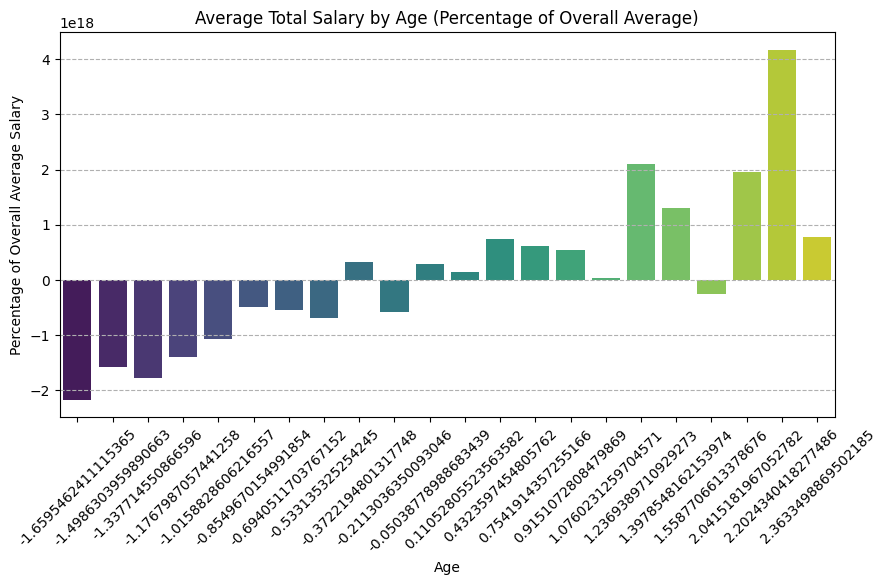

In [ ]:
age_wise_salary=df.groupby('Age')['Total Salary'].mean().reset_index() # Convert Series to DataFrame

# Calculate the overall average salary
overall_avg_salary = df['Total Salary'].mean()

# Compute the percentage of average salary for each age group
age_wise_salary['Salary Percentage'] = (age_wise_salary['Total Salary'] / overall_avg_salary) * 100

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=age_wise_salary, x='Age', y='Salary Percentage', palette='viridis')
plt.title('Average Total Salary by Age (Percentage of Overall Average)')
plt.xlabel('Age')
plt.ylabel('Percentage of Overall Average Salary')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()

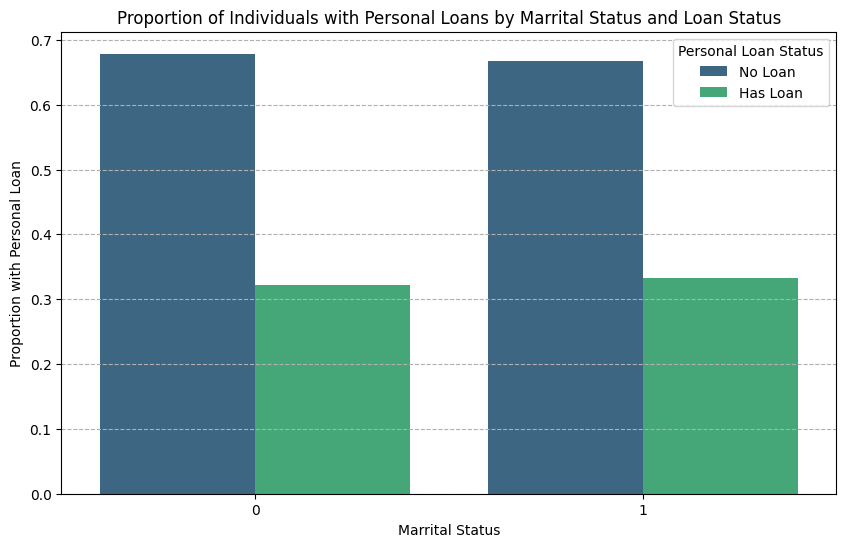

In [ ]:
status_loan_wise = df.groupby(['Marrital Status', 'Personal loan']).size().reset_index(name='Count')

# Calculate the proportion
total_counts = df.groupby('Marrital Status').size().reset_index(name='Total')
status_loan_wise = pd.merge(status_loan_wise, total_counts, on='Marrital Status')
status_loan_wise['Proportion'] = status_loan_wise['Count'] / status_loan_wise['Total']

# Rename columns for clarity
status_loan_wise.columns = ['Marrital Status', 'Personal loan', 'Count', 'Total', 'Proportion']

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=status_loan_wise, x='Marrital Status', y='Proportion', hue='Personal loan', palette='viridis')
plt.title('Proportion of Individuals with Personal Loans by Marrital Status and Loan Status')
plt.xlabel('Marrital Status')
plt.ylabel('Proportion with Personal Loan')

# Adding a legend with proper color mapping
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['No Loan', 'Has Loan'], title='Personal Loan Status', loc='upper right')

plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
X = df[['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Total Salary', 'Price']]
y = df['Personal loan']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.14      0.25         7

    accuracy                           0.70        20
   macro avg       0.84      0.57      0.53        20
weighted avg       0.79      0.70      0.62        20

SVM Confusion Matrix:
[[13  0]
 [ 6  1]]


In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

X=df[['Total Salary']]
y=df['Personal loan']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Calculate metrics using the imported functions, use a different variable name than the function name
mse  = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))

Mean Squared Error: 0.35
R2 Score: -0.5384615384615388
Accuracy: 0.65
